### Clustering Using Kmeans

Clustering pada kasus kali ini bertujuan untuk mengelompokan type dari daerah tujuan wisata dari user berdasarakan _Description_ dari tujuan wisata <br>
dengan langkah-langkah sebagai berikut : <br>

1. tokenize deskripsi pada tujuan wisata
2. remove stopwords pada hasil tokenize menggunakan stopwords bahasa indonesia
3. Ubah kedalam vektor menggunakan TIIDFVectorizer
4. Tentukan nilai k untuk cluster
5. cluster menggunakan kmeans menjadi k cluster
6. definisikan cluster

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('datasheet/tourism_with_id.csv')

In [ ]:
df

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


set stopwords ke bahasa indonesia

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))

ubah description menjadi vaktor menggunakan TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words=stop_words)

X = vect.fit_transform(df['Description'])

c:\Users\danan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


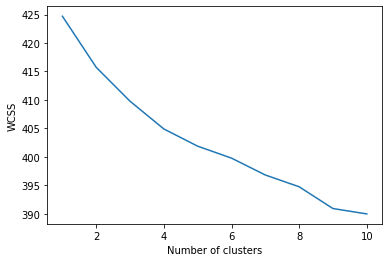

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42)
km.fit(X) 
score = silhouette_score(X, km.labels_, metric='euclidean')

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.028


Setelah mengkalkulasi menggunakan elbow method dan sillhoutte score, didapat cluster dengan k=9 paling tinggi nilainya

In [ ]:
k = 9
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")
 

Top terms per cluster:
Cluster 0:
 hutan
 pinus
 pohon
 kuda
 wisata
 kawasan
 batu
 durian
 gunung
 cibubur
Cluster 1:
 bandung
 air
 curug
 kota
 wisata
 terjun
 candi
 gua
 jawa
 gunung
Cluster 2:
 museum
 indonesia
 monumen
 seni
 jakarta
 gedung
 nasional
 tanggal
 koleksi
 gereja
Cluster 3:
 wisata
 alam
 kawasan
 bukit
 desa
 pemandangan
 wisatawan
 bandung
 objek
 gunung
Cluster 4:
 pantai
 laut
 yogyakarta
 pasir
 karang
 wisatawan
 gunungkidul
 ikan
 km
 wisata
Cluster 5:
 surabaya
 wisata
 taman
 kolam
 anak
 air
 renang
 kenjeran
 patung
 rekreasi
Cluster 6:
 alun
 yogyakarta
 jalan
 keraton
 tugu
 kraton
 museum
 budaya
 beringharjo
 bangunan
Cluster 7:
 masjid
 agung
 al
 islam
 gumuling
 atap
 bandung
 surabaya
 sumur
 cheng
Cluster 8:
 taman
 pulau
 jakarta
 kota
 bandung
 anak
 kepulauan
 indonesia
 seribu
 jalan


Prediction


c:\Users\danan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df['cluster'] = model.fit_predict(X)

In [ ]:
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12,cluster
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1,2
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2,0
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3,5
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4,5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5,3


In [ ]:
df.to_csv('tourism_cluster.csv')

Hasil yang didapat pada clustering menggunakan kmeans, yang selanjutnya akan diinputkan kedalam dataframe, dan akan diolah untuk menghasilkan rekomendasi tempat wisata pada user tertentu berdsarkan cluster yang paling sering dikunjungi